In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob
import pandas as pd

In [22]:
images_path = '/home/ziyad/Projects/AI/colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = '/home/ziyad/Projects/AI/colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = '/home/ziyad/Projects/AI/colorful_fashion_dataset_for_object_detection/'
root = '/home/ziyad/Projects/AI/colorful_fashion_dataset_for_object_detection'

In [3]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])
            
            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

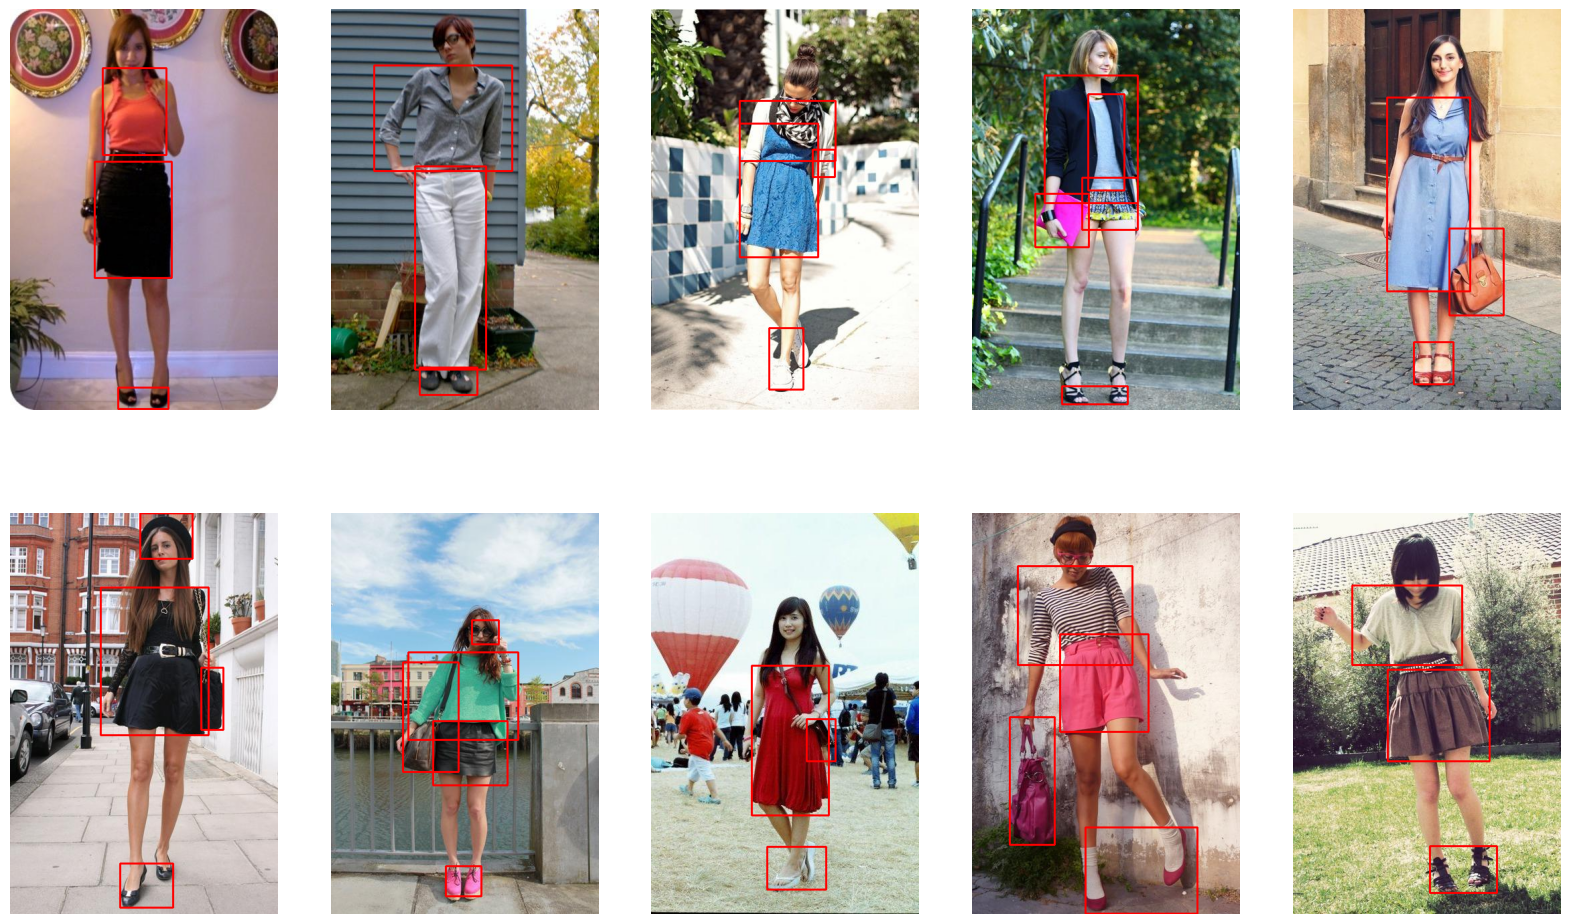

In [5]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

In [9]:
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [10]:
len(train), len(test)

(2145, 537)

In [14]:
base_directory = path

# Create 'train' directory and its subdirectories
os.mkdir(os.path.join(base_directory, 'train'))
os.mkdir(os.path.join(base_directory, 'train/images'))
os.mkdir(os.path.join(base_directory, 'train/labels'))

# Create 'test' directory and its subdirectories
os.mkdir(os.path.join(base_directory, 'test'))
os.mkdir(os.path.join(base_directory, 'test/images'))
os.mkdir(os.path.join(base_directory, 'test/labels'))

In [16]:
train_path = '/home/ziyad/Projects/AI/colorful_fashion_dataset_for_object_detection/train/'
test_path = '/home/ziyad/Projects/AI/colorful_fashion_dataset_for_object_detection/test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [00:00<00:00, 2500.09it/s]


Copying Test Data..!!


100%|██████████| 537/537 [00:00<00:00, 2807.47it/s]


In [20]:
col = ["image_no", "class", "center_x", "center_y", "width", "height"]
train_df = pd.DataFrame(columns=col)
train_df


,class,center_x,center_y,width,height


In [27]:
from pathlib import Path

def get_image_files(directory, extensions=['jpg', 'png']):
    """
    Get Paths to all the images in the specified directory with the given file extensions.

    Parameters:
    - directory (str or Path): The directory path where images are located.
    - extensions (list): List of file extensions to consider as image files.

    Returns:
    - List of Paths to image files.
    """
    directory = Path(directory)
    image_files = []
    
    for extension in extensions:
        pattern = f"*.{extension}"
        image_files.extend(directory.glob(pattern))

    return image_files

In [28]:
import pandas as pd

# Assuming your text files are in the 'labels' directory and have the same name as the corresponding image files
labels_directory = '/home/ziyad/Projects/AI/colorful_fashion_dataset_for_object_detection/train/labels'
image_extension = '.jpg'  # Change this to the actual extension of your image files

col = ["image_no", "class", "center_x", "center_y", "width", "height"]
train_df = pd.DataFrame(columns=col)

# Get a list of image files in the directory
image_files = get_image_files('/home/ziyad/Projects/AI/colorful_fashion_dataset_for_object_detection/train/images', extensions=[image_extension])

for image_file in image_files:
    # Extract the image number from the file name
    image_no = int(image_file.stem)  # Assuming the image file name is a number without extension

    # Construct the corresponding label file path
    label_file = Path(labels_directory) / (image_file.stem + ".txt")

    # Read the contents of the label file
    with open(label_file, 'r') as file:
        labels_content = file.readlines()

    # Extract values from labels content and append to the DataFrame
    for label_line in labels_content:
        values = label_line.strip().split()
        class_id, center_x, center_y, width, height = map(float, values)
        train_df = train_df.append({
            "image_no": image_no,
            "class": class_id,
            "center_x": center_x,
            "center_y": center_y,
            "width": width,
            "height": height
        }, ignore_index=True)

# Display the resulting DataFrame
print(train_df)

Empty DataFrame
Columns: [image_no, class, center_x, center_y, width, height]
Index: []
